<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/linearna_regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model mašinskog učenja - Python

# Importovanje podataka

In [ ]:
import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenjeBrojevi.csv') # df - data frame
df = pd.read_csv('https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenjeBrojeviProfit.csv')
df # print(df)

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit
0,3,10,0.10,6,32,5,0.68,106.36
1,0,0,0.08,96,2,35,0.50,45.64
2,4,15,0.06,41,3,3,0.36,33.90
3,1,5,0.00,292,4,49,0.56,605.08
4,1,5,0.07,101,43,45,0.69,2647.66
...,...,...,...,...,...,...,...,...
11872,0,0,0.06,61,3,30,0.70,87.12
11873,0,0,0.10,13,18,5,0.59,109.66
11874,2,7,0.03,163,20,20,0.39,1153.60
11875,0,0,0.06,13,5,5,0.40,17.10


# Priprema podataka na X i Y

X predstavlja one kolone koje se koriste za dobijanje rezultata, tj. Y,

Y predstavlja konačnu kolonu, onu kolonu čija se vrednost predviđa.

In [ ]:
y = df['Profit']
y

,Profit
0,106.36
1,45.64
2,33.90
3,605.08
4,2647.66
...,...
11872,87.12
11873,109.66
11874,1153.60
11875,17.10


In [ ]:
x = df.drop('Profit', axis = 1) # axis=1 - oznacava da radi sa kolonama, dok ukoliko je axis=0 - radi sa redovima
#x = pd.get_dummies(df.drop('Profit', axis=1)) # Pretvara OrderPriority (Low, High, Medium, ...) kao One-Hot encoding. Tj. dodaju se nove kolone sa true/false za svaku vrednost.
x

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin
0,3,10,0.10,6,32,5,0.68
1,0,0,0.08,96,2,35,0.50
2,4,15,0.06,41,3,3,0.36
3,1,5,0.00,292,4,49,0.56
4,1,5,0.07,101,43,45,0.69
...,...,...,...,...,...,...,...
11872,0,0,0.06,61,3,30,0.70
11873,0,0,0.10,13,18,5,0.59
11874,2,7,0.03,163,20,20,0.39
11875,0,0,0.06,13,5,5,0.40


## Razdvajanje podataka na SET TESTIRANJA i SET TRENIRANJA

Set za treniranje ce sluziti kao set za kreiranje modela, a set za testiranje ce sluziti kao nepoznati podaci koji se koriste za testiranje seta za treniranje.

Za ovaj proces je potrebna scikit-learn biblioteka.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# test_size = 0.2 - set za testiranje ce biti 20% od ukupnog seta, dok ce ostalo biti set za treniranje

x_train

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin
3113,1,5,0.01,21,10,1,0.57
4283,4,15,0.10,14,14,5,0.49
2887,2,7,0.08,41,35,9,0.76
10199,3,10,0.10,46,7,5,0.68
10612,4,15,0.06,10,18,1,0.37
...,...,...,...,...,...,...,...
350,1,5,0.07,10,3,9,0.60
79,3,10,0.07,4,4,1,0.39
8039,2,7,0.07,8,1,6,0.35
6936,1,5,0.07,21,21,1,0.37


In [ ]:
x_test

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin
11753,1,5,0.01,26,15,6,0.39
2967,2,7,0.00,39,5,11,0.61
817,2,7,0.04,419,10,20,0.05
299,2,7,0.05,7,46,6,0.37
398,3,10,0.01,21,19,53,0.78
...,...,...,...,...,...,...,...
4903,1,5,0.00,3,10,1,0.54
1354,0,0,0.02,13,14,3,0.60
5268,2,7,0.10,41,2,34,0.73
980,2,7,0.02,8,52,1,0.36


In [ ]:
y_train

,Profit
3113,116.60
4283,71.44
2887,966.80
10199,181.76
10612,54.80
...,...
350,6.90
79,4.12
8039,-3.76
6936,58.68


In [ ]:
y_test

,Profit
11753,155.16
2967,107.95
817,0.95
299,97.04
398,254.23
...,...
4903,15.20
1354,102.56
5268,17.66
980,140.44


# Kreiranje modela

## Linearna regresija

scikit-learn bibilioteka poseduje nekoliko funkcija koje se pored kreiranje razlicitih setova podataka, mogu koristiti i za izgradnju modela masinskog ucenja.

### Treniranje modela

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) # treniraj prazan model linearne regresije na prosledjenom setu podataka

LinearRegression()

### Primena modela za predviđanje profita

In [ ]:
# lr - Linear Regresion Model
# train - Training Set
# pred - Prediction
# Koriscenje modela kako bi se ostvarila predikcija na set treniranja, model se moze koristiti i na set testiranja
# Predikcija nad x set treniranja
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

for i in range(0, len(y_lr_train_pred), 5):
    print("\t".join(map(str, y_lr_train_pred[i:i+5])))

224.55530426261066	78.49852263663615	1279.9161236498585	197.30798510473096	2.1544333129504594
-9.1921679550519	454.9491072183646	600.4385460672347	403.14073417591044	570.4076699940288
1297.6505609435912	1865.9995456015095	748.8861282546554	1119.087568663746	623.4254429865875
466.5769422279061	1007.4664415204129	1160.7418759038146	1503.3206360052686	2329.805134730707
31.281525997990684	35.348321678373395	-61.84147120182581	1048.2714359402175	229.13005218430771
3048.2694919178593	417.6159152469254	-172.27210272881644	-167.2928226220488	2444.078136414927
1152.72082898314	168.34372857172957	257.4579040827048	-256.8947463142284	2959.914054746825
-151.4716706713242	-174.72993649359046	-197.0786970295893	859.3232234874581	2718.848398904811
1666.0717392665238	2303.680948187652	-171.1091715601691	1833.0630031997666	-458.4330828660012
1296.8024752348738	1887.3540407588766	466.9076722940342	176.35281707695503	429.1827973407601
4742.560898959624	328.9538792924641	208.14699218633837	83.254471948877

In [ ]:
y_lr_test_pred

array([ 208.88426538,  411.06635798,  302.14032584, ...,  816.15359519,
       1050.62223486,  595.05592072])

### Procenat tacnosti modela (*Procena performansi modela*)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# za set treniranja

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# za set testiranja

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# y_train
# y_lr_train_pred

In [ ]:
lr_test_r2

0.25051240282565757

In [ ]:
lr_train_r2

0.27003978766323034

lr_test_r2 (0.16) ≈ lr_train_r2 (0.13)

In [ ]:
lr_train_mse

2455680.6190935774

In [ ]:
lr_test_mse

2005436.5309018607

lr_train_mse (0.082) ≈ lr_test_mse (0.083)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  2455680.6190935774
LR MSE (Test):  2005436.5309018607
LR R2 (Train):  0.27003978766323034
LR R2 (Test):  0.25051240282565757


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,2455680.619094,0.27004,2005436.530902,0.250512


## Random Forest

### Treniranje modela

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### Primena modela za predviđanje profita

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Procenat tacnosti modela (Evaluacija)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,2455680.619094,0.27004,2005436.530902,0.250512


## Upoređivanje modela

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,2455680.619094,0.27004,2005436.530902,0.250512
1,Random Forest,2455680.619094,0.27004,2005436.530902,0.250512


## Vizuelizacija rezultata predikcije

Text(0.5, 0, 'Experimental Profit')

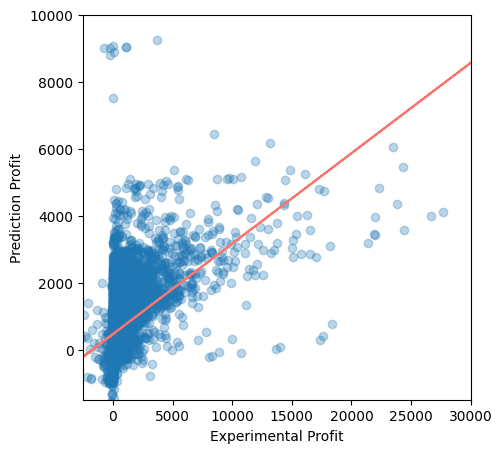

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

# Ograničavanje osa
plt.xlim(-2500, 30000)    # Ograničenje za x osu
plt.ylim(-1500, 10000)     # Ograničenje za y osu

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Prediction Profit')
plt.xlabel('Experimental Profit')